#### This example is Northern division only

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [175]:
populations = pd.read_csv('provincepops.csv')

In [176]:
populations.head()

,Year,Ba,Bua,Cakaudrove,Kadavu,Lau,Lomaiviti,Macuata,Nadroga,Naitasiri,Namosi,Ra,Rewa,Serua,Tailevu
0,1966.0,47823,9758,30000,8631,15989,13500,44433,37000,70000,2721,22500,70000,8000,35000
1,1966.5,48411,9843,30250,8633,15913,13510,45082,37400,72350,2750,22625,70900,8150,35250
2,1967.0,48999,9928,30500,8635,15837,13520,45731,37800,74700,2779,22750,71800,8300,35500
3,1967.5,49587,10013,30750,8637,15761,13530,46380,38200,77050,2808,22875,72700,8450,35750
4,1968.0,50175,10098,31000,8639,15685,13540,47029,38600,79400,2837,23000,73600,8600,36000


In [181]:
#do for all divisions
def update_line(num, data, line, data2, line2, data3, line3):
    line.set_data(data[...,:num])
    line2.set_data(data2[...,:num])
    line3.set_data(data3[...,:num])
    return line, line2, line3

In [185]:
#do this for all provinces
x = populations['Year']
y = populations['Bua']
data = np.array([x,y])
#--
x2 = x
y2 = populations['Cakaudrove']
data2 = np.array([x2,y2])
#--
x3 = x
y3 = populations['Macuata']
data3 = np.array([x3,y3])
#--


In [147]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

<IPython.core.display.Javascript object>


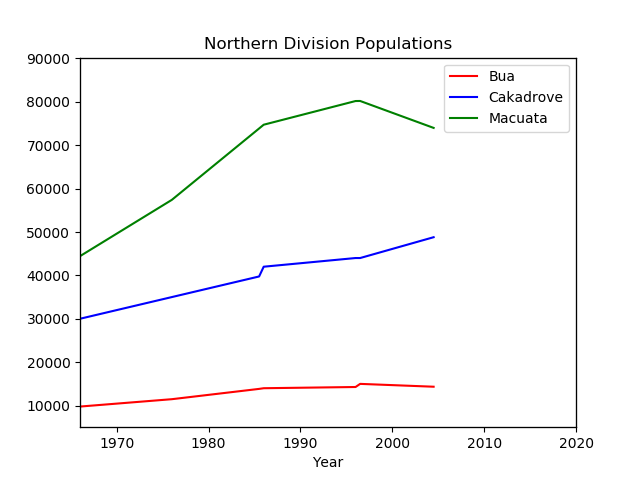

[]

In [186]:
fig = plt.figure()
#a  new ax for each province
ax = fig.add_subplot(111)
l, = ax.plot([],[],'r-',label="Bua")
ax2 = ax.twinx()
k = ax.plot([],[],'b-',label="Cakadrove")[0]
ax3 = ax.twinx()
m = ax.plot([],[],'g-',label="Macuata")[0]


ax.legend([l,k,m,n,p],["Bua","Cakadrove","Macuata"], loc=0)
ax.set_xlabel("Year")

ax.set_ylim(5000, populations['Macuata'].max()+10000)
ax.set_xlim(1966,2020)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_xlim(1966,2020)
ax3.axes.get_yaxis().set_visible(False)
ax3.set_xlim(1966,2020)


plt.title('Northern Division Populations')
plt.plot()


In [187]:
#begin animation and save
line_ani = animation.FuncAnimation(fig, update_line, frames=105, fargs=(data, l, data2, k, data3, m))
line_ani.save('northern.mp4',writer=writer)